<a href="https://colab.research.google.com/github/davidofitaly/06_reduction_dimensions_projects/blob/main/01_pca_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data loading](#1)
3. [Data mining](#2)
4. [Standarization](#3)
5. [PCA - 2 components](#4)
6. [PCA - 3 components](#5)
7. [PCA - 0.95](#6)
8. [Comparison of the percentage of explained variance](#7)



### <a name='0'> </a> Import of libraries

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')


Pandas: 2.2.2
Numpy: 1.26.4


### <a name='1'> </a> Data loading

In [ ]:
# Import load_digits datasets
from sklearn.datasets import load_digits

digits = load_digits()
all_data = digits.copy()

data = all_data['data']
target = all_data['target']

### <a name='2'> </a> Data mining

In [ ]:
data.shape

(1797, 64)

In [ ]:
target.shape

(1797,)

In [ ]:
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

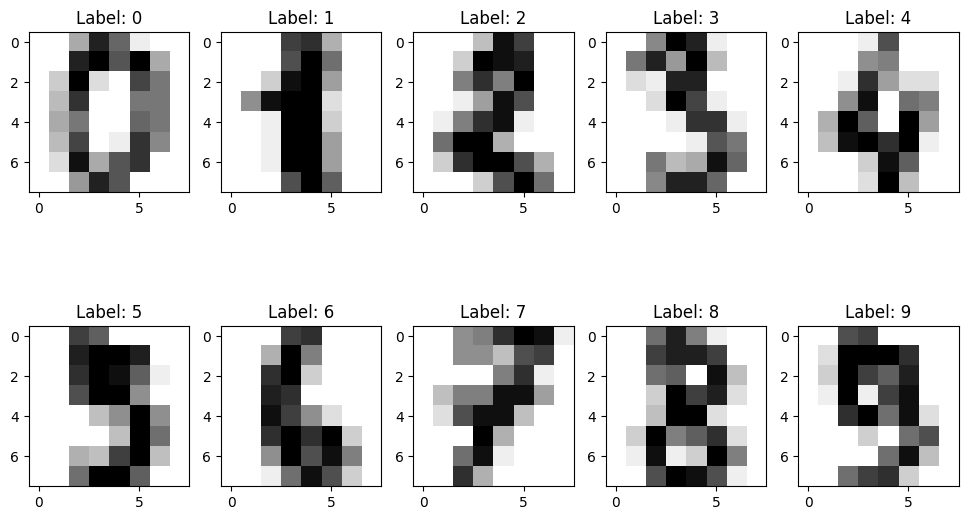

In [ ]:
# Displaying the first 10 images from the Digits dataset with their corresponding labels
plt.figure(figsize=(12,7))
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(2,5, index +1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
plt.show()

### <a name='3'> </a> Standarization

In [ ]:
# Standardizing the dataset to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)

data_std[1]

array([ 0.        , -0.33501649, -1.09493684,  0.03864775,  0.26875116,
       -0.13801953, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
       -1.91557297, -0.24630352,  1.19644995,  0.13619465, -0.51499146,
       -0.13043338, -0.04462507, -0.72764628, -1.2133854 ,  1.38030848,
        1.44186017, -0.29155283, -0.54880546, -0.11422184, -0.03337973,
        1.44018517,  0.95451315,  1.22058589,  0.98740215, -0.94558832,
       -0.62889588, -0.04723238,  0.        , -0.67237227, -1.05445197,
        1.10556952,  0.96064411, -0.97870236, -0.82269451,  0.        ,
       -0.06134367, -0.5312841 , -0.89983895,  1.36217503,  1.33078862,
       -0.39278683, -0.79827225, -0.08874162, -0.03543326, -0.40357499,
       -1.15311752,  1.23639392,  1.24208282, -0.45750018, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135, -1.08938309, -0.24900951,
        0.84963214,  0.54856067, -0.5056698 , -0.19600752])

### <a name='4'> </a> PCA - 2 components

In [ ]:
# Applying PCA to reduce the dimensionality of the standardized data to 2 principal components
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_std)

data_pca_2[:5]


array([[-1.91421366, -0.95450157],
       [-0.58898033,  0.9246358 ],
       [-1.30203906, -0.31718883],
       [ 3.0207702 , -0.86877232],
       [-4.52894903, -1.09347989]])

In [ ]:
# Creating a DataFrame to hold the PCA results and the corresponding class labels
df_pca_2 = pd.DataFrame(data={'pca_1': data_pca_2[:, 0], 'pca_2': data_pca_2[:,1], 'class': target})
df_pca_2[:10]

,pca_1,pca_2,class
0,-1.914214,-0.954502,0
1,-0.588980,0.924636,1
2,-1.302039,-0.317189,2
3,3.020770,-0.868772,3
4,-4.528949,-1.093480,4
5,1.301890,-1.148183,5
6,-1.434222,-2.957845,6
7,-0.614240,5.462184,7
8,1.098451,-0.665823,8
9,0.537970,-0.777493,9


In [ ]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca_2 = pd.DataFrame(data={'explained_variance_ratio': pca_2.explained_variance_ratio_})
results_pca_2['cumulative'] = results_pca_2['explained_variance_ratio'].cumsum()
results_pca_2['component'] = results_pca_2.index + 1

results_pca_2

,explained_variance_ratio,cumulative,component
0,0.120339,0.120339,1
1,0.095611,0.215950,2


In [ ]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca_2['component'], y=results_pca_2['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca_2['component'], y=results_pca_2['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 2 components', width=1000, template='ggplot2'))

fig.show()

In [ ]:
px.scatter(df_pca_2, 'pca_1', 'pca_2', color=df_pca_2['class'], width=1000)

### <a name='5'> </a> PCA - 3 components

In [ ]:
# Applying PCA to reduce the dimensionality of the standardized data to 3 principal components
from sklearn.decomposition import PCA

pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(data_std)

data_pca_3[:5]

array([[-1.91421366, -0.95450157, -3.94603482],
       [-0.58898033,  0.9246358 ,  3.92475494],
       [-1.30203906, -0.31718883,  3.02333293],
       [ 3.0207702 , -0.86877232, -0.80174419],
       [-4.52894903, -1.09347989,  0.97312081]])

In [ ]:
# Creating a DataFrame to hold the PCA results and the corresponding class labels
df_pca_3 = pd.DataFrame(data={'pca_1': data_pca_3[:, 0], 'pca_2': data_pca_3[:,1], 'pca_3': data_pca_3[:,2], 'class': target})
df_pca_3[:10]

,pca_1,pca_2,pca_3,class
0,-1.914214,-0.954502,-3.946035,0
1,-0.588980,0.924636,3.924755,1
2,-1.302039,-0.317189,3.023333,2
3,3.020770,-0.868772,-0.801744,3
4,-4.528949,-1.093480,0.973121,4
5,1.301890,-1.148183,-1.574607,5
6,-1.434222,-2.957845,2.831278,6
7,-0.614240,5.462184,0.658242,7
8,1.098451,-0.665823,-0.041023,8
9,0.537970,-0.777493,-1.568922,9


In [ ]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca_3 = pd.DataFrame(data={'explained_variance_ratio': pca_3.explained_variance_ratio_})
results_pca_3['cumulative'] = results_pca_3['explained_variance_ratio'].cumsum()
results_pca_3['component'] = results_pca_3.index + 1

results_pca_3

,explained_variance_ratio,cumulative,component
0,0.120339,0.120339,1
1,0.095611,0.215950,2
2,0.084444,0.300394,3


In [ ]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca_3['component'], y=results_pca_3['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca_3['component'], y=results_pca_3['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 3 components', width=1000, template='ggplot2'))

fig.show()

In [ ]:
px.scatter_3d(df_pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', opacity=0.8, size_max=8, width=1000)

### <a name='6'> </a> PCA - 0.95

In [ ]:
# Perform PCA to reduce dimensionality while retaining 95% of the variance in the data.
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_std)

data_pca[:5]

array([[-1.91421366e+00, -9.54501571e-01, -3.94603482e+00,
        -2.02872332e+00, -2.67172802e-01,  5.30326875e-01,
        -1.41532079e+00,  1.49606164e+00,  1.24914338e-01,
        -8.22245613e-01, -4.99692678e-01, -7.89466185e-01,
         2.28124962e-01, -1.95142307e-01,  8.37040373e-01,
         1.04341337e-01,  1.85323078e-01, -9.00567516e-02,
         4.12754041e-01,  4.30516951e-01,  4.50993683e-01,
         5.58703084e-01,  5.08825936e-01, -7.58896186e-01,
        -4.64500047e-01,  7.32175998e-01, -3.27317960e-01,
        -1.57022055e-01,  4.04917553e-01, -3.24594317e-01,
         5.34682551e-01,  1.79790219e-02, -4.79503792e-02,
        -1.91242448e-02, -1.17189928e-01, -7.09048730e-01,
        -8.24101236e-02,  8.14059254e-01,  2.49306000e-02,
        -3.21931463e-01],
       [-5.88980330e-01,  9.24635800e-01,  3.92475494e+00,
         1.77985046e+00, -9.93429728e-01, -6.75651818e-01,
         1.87856458e+00,  5.56335527e-01,  1.07987725e+00,
         8.74505288e-02, -5.05

In [ ]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results_pca['cumulative'] = results_pca['explained_variance_ratio'].cumsum()
results_pca['component'] = results_pca.index + 1

results_pca

,explained_variance_ratio,cumulative,component
0,0.120339,0.120339,1
1,0.095611,0.215950,2
2,0.084444,0.300394,3
3,0.064984,0.365378,4
4,0.048602,0.413979,5
5,0.042141,0.456121,6
6,0.039421,0.495542,7
7,0.033894,0.529435,8
8,0.029982,0.559418,9
9,0.029320,0.588738,10


In [ ]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca['component'], y=results_pca['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca['component'], y=results_pca['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 0.95', width=1000, template='ggplot2'))

fig.show()

### <a name='7'> </a> Comparison of the percentage of explained variance

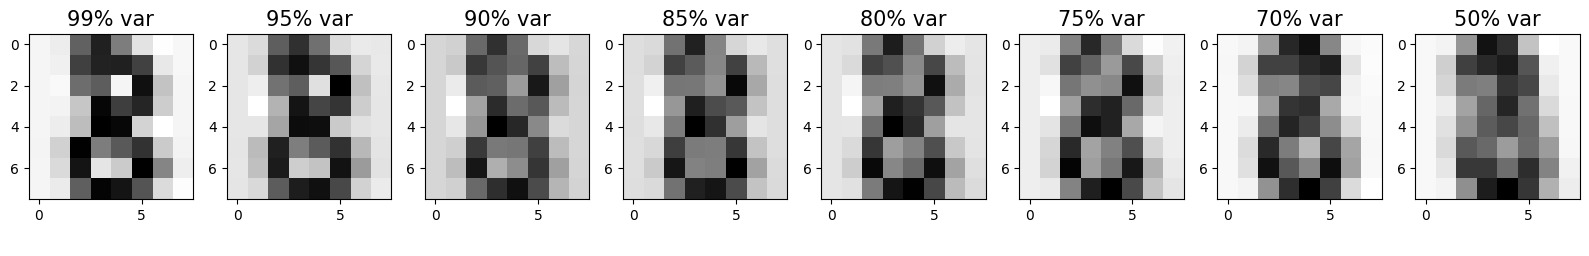

In [ ]:
def make_pca(n_components, data, idx=8):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)

    approx = pca.inverse_transform(data_pca)

    # Displaying the reconstructed image
    plt.imshow(approx[idx].reshape(8, 8), cmap='gray_r', interpolation='nearest')
    plt.xlabel(f'{pca.n_components_} components', color='white', fontsize=12)
    plt.title(f'{int(n_components * 100)}% var', color='black', fontsize=15)

# Creating a chart with different variances
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, data)

plt.tight_layout()
plt.show()